<a href="https://colab.research.google.com/github/PhreshAda/My-work/blob/main/Tech_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-abc5793ee4fd>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['diabete4_binary'] = df_filtered['diabete4'].map({1.0: 1, 3.0: 0})


Data after filtering and mapping:
   _state  fmonth    idate  imonth  iday  iyear  dispcode       seqno  \
0       1       1  2032022       2     3   2022      1100  2022000001   
1       1       1  2042022       2     4   2022      1100  2022000002   
2       1       1  2022022       2     2   2022      1100  2022000003   
3       1       1  2032022       2     3   2022      1100  2022000004   
4       1       1  2022022       2     2   2022      1100  2022000005   

         _psu  ctelenm1  ...  _lcsrec  drnkany6  drocdy4_  _rfbing6  _drnkwk2  \
0  2022000001       1.0  ...      NaN       2.0       0.0       1.0       0.0   
1  2022000002       1.0  ...      NaN       2.0       0.0       1.0       0.0   
2  2022000003       1.0  ...      NaN       2.0       0.0       1.0       0.0   
3  2022000004       1.0  ...      2.0       2.0       0.0       1.0       0.0   
4  2022000005       1.0  ...      NaN       1.0      10.0       1.0     140.0   

   _rfdrhv8  _flshot7  _pneumo3  _aidtst

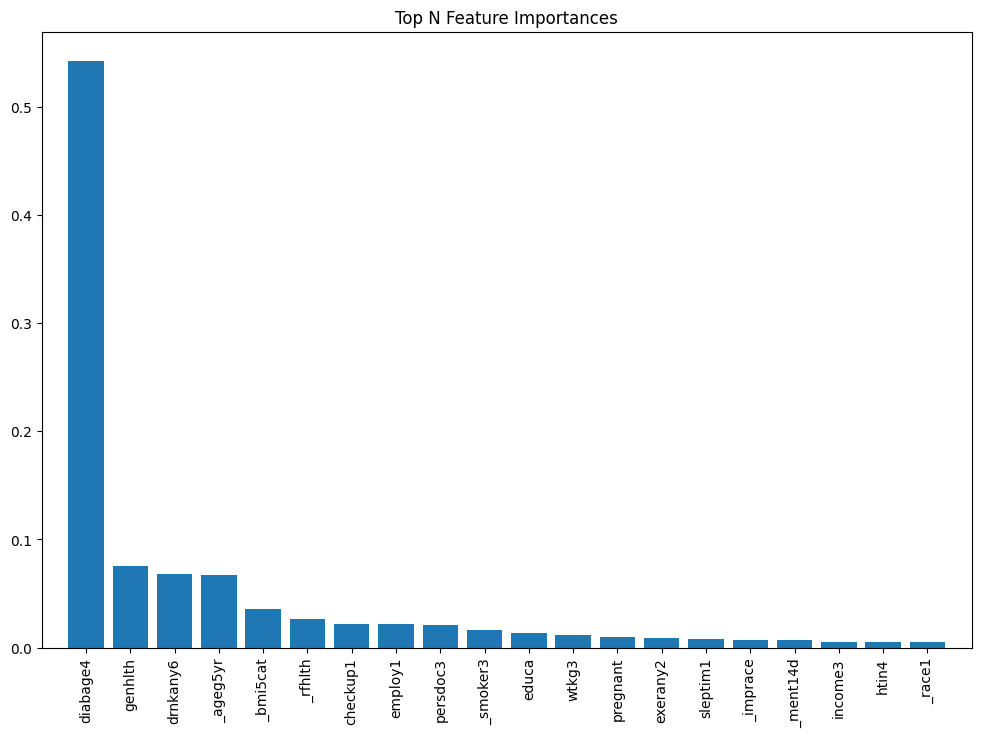

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer


# Load the dataset
df = pd.read_csv('/content/TecCh.csv')

# Filter to Include Only 1.0 and 3.0 for the Target Variable
df_filtered = df[df['diabete4'].isin([1.0, 3.0])]

# Map the Target Variable to Binary
df_filtered['diabete4_binary'] = df_filtered['diabete4'].map({1.0: 1, 3.0: 0})

# Check the data after filtering and mapping
print("Data after filtering and mapping:")
print(df_filtered.head())
print(df_filtered['diabete4_binary'].value_counts())

# Define the selected features
selected_features = ['sexvar', 'genhlth', 'physhlth', 'poorhlth', 'persdoc3',
                     'medcost1', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
                     'cvdstrk3', 'diabage4', 'educa', 'veteran3',
                     'employ1', 'income3', 'pregnant', '_imprace', '_rfhlth',
                     '_phys14d', '_ment14d', '_michd', '_race1', '_sex',
                     '_ageg5yr', 'htin4', 'wtkg3', '_bmi5cat', '_smoker3',
                     'drnkany6', 'sleptim1', 'chckdny2']

# Filter the DataFrame to include only the selected features and the target variable
df_filtered = df_filtered[selected_features + ['diabete4_binary']]

# Separate the target variable
y = df_filtered['diabete4_binary']
X = df_filtered.drop(columns=['diabete4_binary'])

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or other strategies
X = imputer.fit_transform(X)

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Check the shape of X to ensure it matches the length of selected_features
print(f"Shape of X after filtering: {X.shape}")

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
cm = confusion_matrix(y_val, y_pred)
cr = classification_report(y_val, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n {cm}')
print(f'Classification Report:\n {cr}')

# Plot Feature Importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Ensure that the number of features in selected_features matches the number of features used in the model
assert len(selected_features) == X.shape[1], "Mismatch between selected_features and actual number of features in X"

# Define the number of top features to plot
N = 20

# Print the feature ranking for the top N features
print("Top N feature ranking:")

for f in range(min(N, len(selected_features))):
    print(f"{f + 1}. feature {selected_features[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Top N Feature Importances")
plt.bar(range(min(N, len(selected_features))), importances[indices[:min(N, len(selected_features))]], align="center")
plt.xticks(range(min(N, len(selected_features))), [selected_features[i] for i in indices[:min(N, len(selected_features))]], rotation=90)
plt.xlim([-1, min(N, len(selected_features))])
plt.show()


In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 21.3 MB/s eta 0:00:00


Top N feature ranking:
1. feature diabage4 (0.5422545502030096)
2. feature genhlth (0.07569701926309581)
3. feature drnkany6 (0.0678026481741466)
4. feature _ageg5yr (0.06740931421332286)
5. feature _bmi5cat (0.03589115323345588)
6. feature _rfhlth (0.02599192945093481)
7. feature checkup1 (0.02206459686722898)
8. feature employ1 (0.02141726397339262)
9. feature persdoc3 (0.02087564784000968)
10. feature _smoker3 (0.016551093169070916)
11. feature educa (0.013048675834969607)
12. feature wtkg3 (0.011978960759547307)
13. feature pregnant (0.01017214414845884)
14. feature exerany2 (0.008630935889229101)
15. feature sleptim1 (0.008135459366596967)
16. feature _imprace (0.0068509425653816205)
17. feature _ment14d (0.00659106459504389)
18. feature income3 (0.005442902149860903)
19. feature htin4 (0.005204760491983356)
20. feature _race1 (0.004819372695379031)


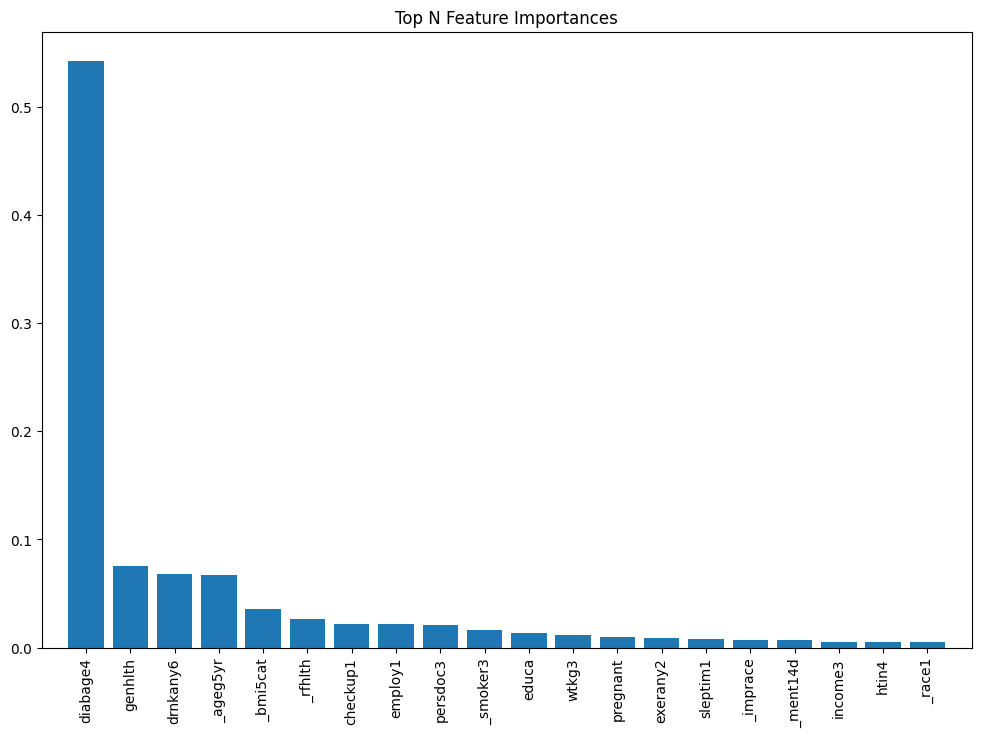

In [ ]:

# Plot Feature Importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Ensure that the number of features in selected_features matches the number of features used in the model
assert len(selected_features) == X.shape[1], "Mismatch between selected_features and actual number of features in X"

# Define the number of top features to plot
N = 20

# Print the feature ranking for the top N features
print("Top N feature ranking:")

for f in range(min(N, len(selected_features))):
    print(f"{f + 1}. feature {selected_features[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Top N Feature Importances")
plt.bar(range(min(N, len(selected_features))), importances[indices[:min(N, len(selected_features))]], align="center")
plt.xticks(range(min(N, len(selected_features))), [selected_features[i] for i in indices[:min(N, len(selected_features))]], rotation=90)
plt.xlim([-1, min(N, len(selected_features))])
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [0.99989819 0.99979638 0.99959275 0.99928731 0.99949094]
Mean cross-validation score: 0.9996131134188557


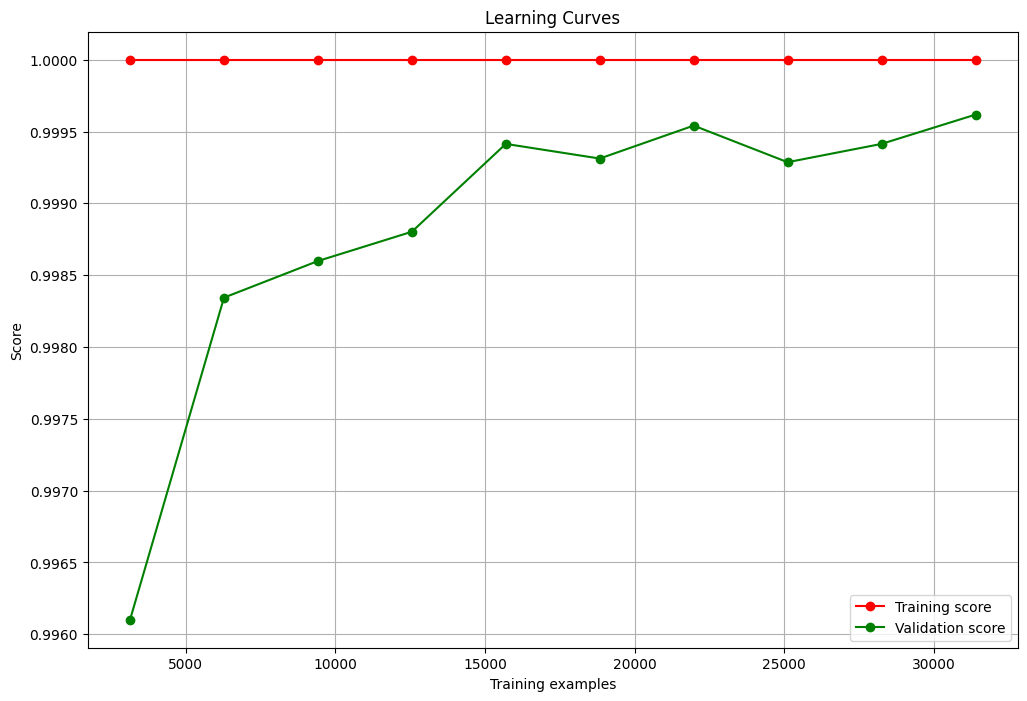

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

In [ ]:
# Load the dataset
df = pd.read_csv('/content/TecCh.csv')

<ipython-input-6-cfed466e3296>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['diabete4_binary'] = df_filtered['diabete4'].map({1.0: 1, 3.0: 0})


Columns in df_filtered:
Index(['sexvar', 'genhlth', 'physhlth', 'poorhlth', 'persdoc3', 'medcost1',
       'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4', 'cvdstrk3', 'educa',
       'veteran3', 'employ1', 'income3', 'pregnant', '_imprace', '_rfhlth',
       '_phys14d', '_ment14d', '_michd', '_race1', '_sex', '_ageg5yr', 'htin4',
       'wtkg3', '_bmi5cat', '_smoker3', 'drnkany6', 'sleptim1', 'chckdny2',
       'diabete4_binary'],
      dtype='object')
Shape of X_full: (49110, 31)
Number of selected features: 31
Validation Accuracy: 0.8621462024027693
Validation Confusion Matrix:
 [[8160  331]
 [1023  308]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      8491
           1       0.48      0.23      0.31      1331

    accuracy                           0.86      9822
   macro avg       0.69      0.60      0.62      9822
weighted avg       0.83      0.86      0.84      9822

Test Accuracy: 0.860415

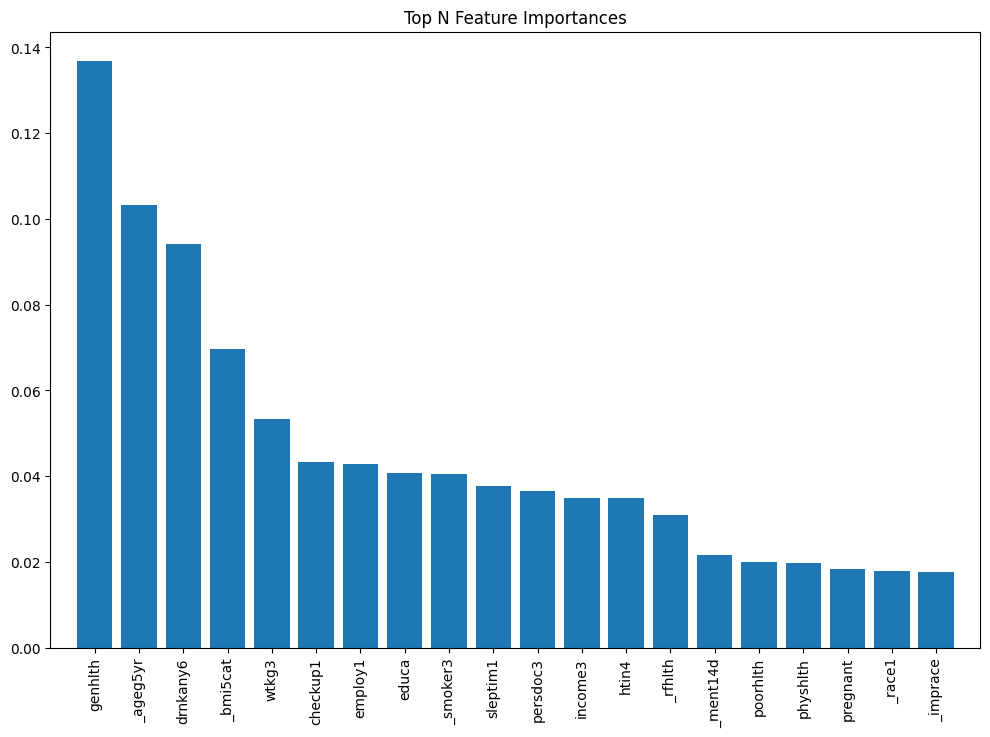

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np



# Filter to Include Only 1.0 and 3.0 for the Target Variable
df_filtered = df[df['diabete4'].isin([1.0, 3.0])]

# Map the Target Variable to Binary
df_filtered['diabete4_binary'] = df_filtered['diabete4'].map({1.0: 1, 3.0: 0})

# Define the selected features, excluding the target variable 'diabete4' and 'diabage4'
selected_features = ['sexvar', 'genhlth', 'physhlth', 'poorhlth', 'persdoc3',
                     'medcost1', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
                     'cvdstrk3', 'educa', 'veteran3', 'employ1', 'income3',
                     'pregnant', '_imprace', '_rfhlth', '_phys14d', '_ment14d',
                     '_michd', '_race1', '_sex', '_ageg5yr', 'htin4', 'wtkg3',
                     '_bmi5cat', '_smoker3', 'drnkany6', 'sleptim1', 'chckdny2']

# Filter the DataFrame to include only the selected features and the target variable
df_filtered = df_filtered[selected_features + ['diabete4_binary']]

# Debugging: Print the columns of df_filtered
print("Columns in df_filtered:")
print(df_filtered.columns)

# Split the data into train+validation and test sets
X_full = df_filtered.drop(columns=['diabete4_binary'])
y_full = df_filtered['diabete4_binary']

# Debugging: Print the shape of X_full and the length of selected_features
print(f"Shape of X_full: {X_full.shape}")
print(f"Number of selected features: {len(selected_features)}")

X_train_val, X_test, y_train_val, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

# Further split train+validation into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Create the imputer and scaler on the training data
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_resampled, y_resampled)

# Predict on validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_cm = confusion_matrix(y_val, y_val_pred)
val_cr = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Confusion Matrix:\n {val_cm}')
print(f'Validation Classification Report:\n {val_cr}')

# Predict on test set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_cr = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Confusion Matrix:\n {test_cm}')
print(f'Test Classification Report:\n {test_cr}')

# Plot Feature Importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Ensure that the number of features in selected_features matches the number of features used in the model
assert len(selected_features) == X_full.shape[1], "Mismatch between selected_features and actual number of features in X"

# Define the number of top features to plot
N = 20

# Print the feature ranking for the top N features
print("Top N feature ranking:")

for f in range(min(N, len(selected_features))):
    print(f"{f + 1}. feature {selected_features[indices[f]]} ({importances[indices[f]]})")

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Top N Feature Importances")
plt.bar(range(min(N, len(selected_features))), importances[indices[:min(N, len(selected_features))]], align="center")
plt.xticks(range(min(N, len(selected_features))), [selected_features[i] for i in indices[:min(N, len(selected_features))]], rotation=90)
plt.xlim([-1, min(N, len(selected_features))])
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample', {0: 1, 1: 3}, {0: 1, 1: 5}]
}

# Initialize the RandomForest model
model = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='f1_macro', verbose=2)

# Fit the model
grid_search.fit(X_resampled, y_resampled)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the model with the best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_resampled, y_resampled)

# Predict on validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_cm = confusion_matrix(y_val, y_val_pred)
val_cr = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Confusion Matrix:\n {val_cm}')
print(f'Validation Classification Report:\n {val_cr}')

# Predict on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_cr = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Confusion Matrix:\n {test_cm}')
print(f'Test Classification Report:\n {test_cr}')


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.99989819 0.99979638 0.99959275 0.99928731 0.99949094]
Mean cross-validation score: 0.9996131134188557


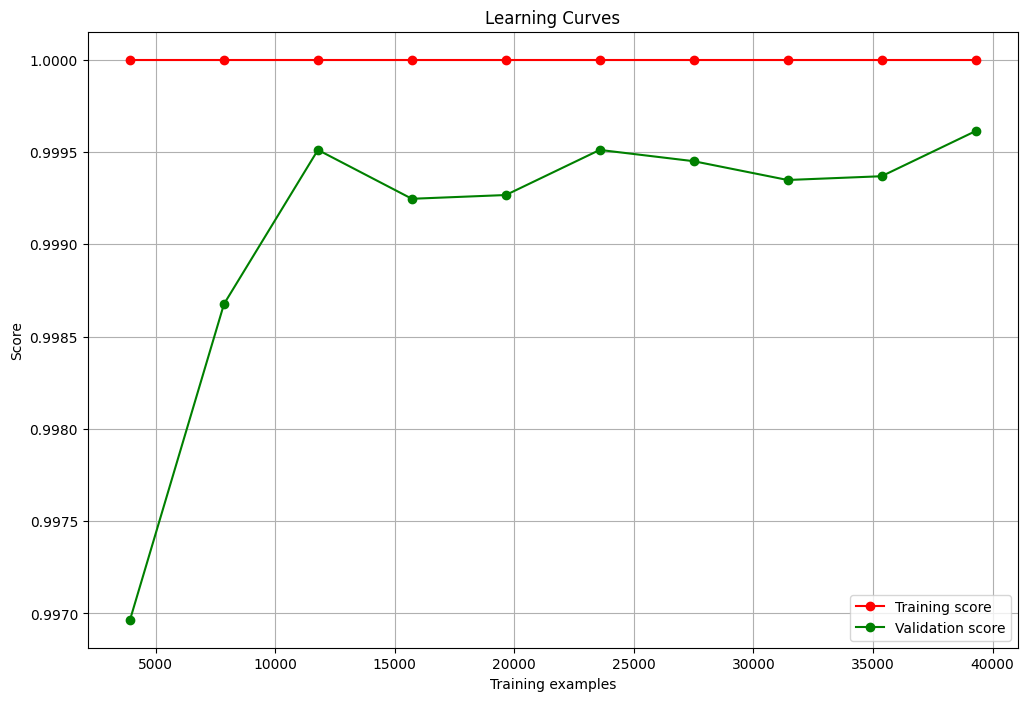

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', color='g', label='Validation score')
plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'class_weight': ['balanced', 'balanced_subsample', {0: 1, 1: 3}, {0: 1, 1: 5}]
}

# Initialize the RandomForest model
model = RandomForestClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, scoring='f1_macro', verbose=2, random_state=42)

# Fit the model
random_search.fit(X_resampled, y_resampled)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

# Train the model with the best parameters
best_model = RandomForestClassifier(**best_params, random_state=42)
best_model.fit(X_resampled, y_resampled)

# Predict on validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_cm = confusion_matrix(y_val, y_val_pred)
val_cr = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy}')
print(f'Validation Confusion Matrix:\n {val_cm}')
print(f'Validation Classification Report:\n {val_cr}')

# Predict on test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_cr = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Confusion Matrix:\n {test_cm}')
print(f'Test Classification Report:\n {test_cr}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 158}
Best Score: 0.9060546854000865
Validation Accuracy: 0.8613317043372022
Validation Confusion Matrix:
 [[8176  315]
 [1047  284]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      8491
           1       0.47      0.21      0.29      1331

    accuracy                           0.86      9822
   macro avg       0.68      0.59      0.61      9822
weighted avg       0.83      0.86      0.84      9822

Test Accuracy: 0.8605172062716351
Test Confusion Matrix:
 [[8167  323]
 [1047  285]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      8490
           1       0.47      0.21      0.29      1332

    accuracy               

In [ ]:
from imblearn.over_sampling import ADASYN
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Apply ADASYN to balance the classes
adasyn = ADASYN(random_state=42)
X_resampled_ada, y_resampled_ada = adasyn.fit_resample(X_train, y_train)

# Train an XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_resampled_ada) / sum(y_resampled_ada == 1))
xgb_model.fit(X_resampled_ada, y_resampled_ada)

# Evaluate on validation set
y_val_pred_xgb = xgb_model.predict(X_val)
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
val_cm_xgb = confusion_matrix(y_val, y_val_pred_xgb)
val_cr_xgb = classification_report(y_val, y_val_pred_xgb)

print(f'Validation Accuracy (XGBoost): {val_accuracy_xgb}')
print(f'Validation Confusion Matrix (XGBoost):\n {val_cm_xgb}')
print(f'Validation Classification Report (XGBoost):\n {val_cr_xgb}')

# Evaluate on test set
y_test_pred_xgb = xgb_model.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
test_cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
test_cr_xgb = classification_report(y_test, y_test_pred_xgb)

print(f'Test Accuracy (XGBoost): {test_accuracy_xgb}')
print(f'Test Confusion Matrix (XGBoost):\n {test_cm_xgb}')
print(f'Test Classification Report (XGBoost):\n {test_cr_xgb}')


Validation Accuracy (XGBoost): 0.8452453675422521
Validation Confusion Matrix (XGBoost):
 [[7764  727]
 [ 793  538]]
Validation Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      8491
           1       0.43      0.40      0.41      1331

    accuracy                           0.85      9822
   macro avg       0.67      0.66      0.66      9822
weighted avg       0.84      0.85      0.84      9822

Test Accuracy (XGBoost): 0.8423946243127672
Test Confusion Matrix (XGBoost):
 [[7753  737]
 [ 811  521]]
Test Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      8490
           1       0.41      0.39      0.40      1332

    accuracy                           0.84      9822
   macro avg       0.66      0.65      0.66      9822
weighted avg       0.84      0.84      0.84      9822



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'scale_pos_weight': [1, 2, 3, 5]
}

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, scoring='f1_macro', verbose=2, random_state=42)

# Fit the model
random_search.fit(X_resampled_ada, y_resampled_ada)

# Get the best parameters and the best score
best_params_xgb = random_search.best_params_
best_score_xgb = random_search.best_score_

print(f"Best Parameters: {best_params_xgb}")
print(f"Best Score: {best_score_xgb}")

# Train the model with the best parameters
best_xgb_model = XGBClassifier(**best_params_xgb, random_state=42)
best_xgb_model.fit(X_resampled_ada, y_resampled_ada)

# Evaluate on validation set
y_val_pred_best_xgb = best_xgb_model.predict(X_val)
val_accuracy_best_xgb = accuracy_score(y_val, y_val_pred_best_xgb)
val_cm_best_xgb = confusion_matrix(y_val, y_val_pred_best_xgb)
val_cr_best_xgb = classification_report(y_val, y_val_pred_best_xgb)

print(f'Validation Accuracy (Best XGBoost): {val_accuracy_best_xgb}')
print(f'Validation Confusion Matrix (Best XGBoost):\n {val_cm_best_xgb}')
print(f'Validation Classification Report (Best XGBoost):\n {val_cr_best_xgb}')

# Evaluate on test set
y_test_pred_best_xgb = best_xgb_model.predict(X_test)
test_accuracy_best_xgb = accuracy_score(y_test, y_test_pred_best_xgb)
test_cm_best_xgb = confusion_matrix(y_test, y_test_pred_best_xgb)
test_cr_best_xgb = classification_report(y_test, y_test_pred_best_xgb)

print(f'Test Accuracy (Best XGBoost): {test_accuracy_best_xgb}')
print(f'Test Confusion Matrix (Best XGBoost):\n {test_cm_best_xgb}')
print(f'Test Classification Report (Best XGBoost):\n {test_cr_best_xgb}')


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 189, 'scale_pos_weight': 1, 'subsample': 0.6}
Best Score: 0.8913818705779489
Validation Accuracy (Best XGBoost): 0.8683567501527184
Validation Confusion Matrix (Best XGBoost):
 [[8232  259]
 [1034  297]]
Validation Classification Report (Best XGBoost):
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      8491
           1       0.53      0.22      0.31      1331

    accuracy                           0.87      9822
   macro avg       0.71      0.60      0.62      9822
weighted avg       0.84      0.87      0.84      9822

Test Accuracy (Best XGBoost): 0.8639788230502953
Test Confusion Matrix (Best XGBoost):
 [[8220  270]
 [1066  266]]
Test Classification Report (Best XGBoost):
               precision    recall  f1-score   support

           0       0.89      0.97      0.92   

In [ ]:
from lightgbm import LGBMClassifier

# Train a LightGBM model
lgbm_model = LGBMClassifier(random_state=42, class_weight='balanced')
lgbm_model.fit(X_resampled_ada, y_resampled_ada)

# Evaluate on validation set
y_val_pred_lgbm = lgbm_model.predict(X_val)
val_accuracy_lgbm = accuracy_score(y_val, y_val_pred_lgbm)
val_cm_lgbm = confusion_matrix(y_val, y_val_pred_lgbm)
val_cr_lgbm = classification_report(y_val, y_val_pred_lgbm)

print(f'Validation Accuracy (LightGBM): {val_accuracy_lgbm}')
print(f'Validation Confusion Matrix (LightGBM):\n {val_cm_lgbm}')
print(f'Validation Classification Report (LightGBM):\n {val_cr_lgbm}')

# Evaluate on test set
y_test_pred_lgbm = lgbm_model.predict(X_test)
test_accuracy_lgbm = accuracy_score(y_test, y_test_pred_lgbm)
test_cm_lgbm = confusion_matrix(y_test, y_test_pred_lgbm)
test_cr_lgbm = classification_report(y_test, y_test_pred_lgbm)

print(f'Test Accuracy (LightGBM): {test_accuracy_lgbm}')
print(f'Test Confusion Matrix (LightGBM):\n {test_cm_lgbm}')
print(f'Test Classification Report (LightGBM):\n {test_cr_lgbm}')


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 24763, number of negative: 25471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6567
[LightGBM] [Info] Number of data points in the train set: 50234, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Validation Accuracy (LightGBM): 0.8671350030543677
Validation Confusion Matrix (LightGBM):
 [[8226  265]
 [1040  291]]
Validation Classification Report (LightGBM):
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      8491
           1       0.52      0.22      0.31      1331

    accuracy                           0.87      9822
   macro avg       0.71      0.59      0.62      9822
weighte

In [ ]:
from sklearn.ensemble import VotingClassifier

# Combine models in a voting classifier
voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(**best_params, random_state=42)),
    ('xgb', XGBClassifier(**best_params_xgb, random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42, class_weight='balanced'))
], voting='soft')

# Train the ensemble model
voting_model.fit(X_resampled_ada, y_resampled_ada)

# Evaluate on validation set
y_val_pred_voting = voting_model.predict(X_val)
val_accuracy_voting = accuracy_score(y_val, y_val_pred_voting)
val_cm_voting = confusion_matrix(y_val, y_val_pred_voting)
val_cr_voting = classification_report(y_val, y_val_pred_voting)

print(f'Validation Accuracy (Voting): {val_accuracy_voting}')
print(f'Validation Confusion Matrix (Voting):\n {val_cm_voting}')
print(f'Validation Classification Report (Voting):\n {val_cr_voting}')

# Evaluate on test set
y_test_pred_voting = voting_model.predict(X_test)
test_accuracy_voting = accuracy_score(y_test, y_test_pred_voting)
test_cm_voting = confusion_matrix(y_test, y_test_pred_voting)
test_cr_voting = classification_report(y_test, y_test_pred_voting)

print(f'Test Accuracy (Voting): {test_accuracy_voting}')
print(f'Test Confusion Matrix (Voting):\n {test_cm_voting}')
print(f'Test Classification Report (Voting):\n {test_cr_voting}')

[LightGBM] [Info] Number of positive: 24763, number of negative: 25471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6567
[LightGBM] [Info] Number of data points in the train set: 50234, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Validation Accuracy (Voting): 0.8667277540215842
Validation Confusion Matrix (Voting):
 [[8242  249]
 [1060  271]]
Validation Classification Report (Voting):
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      8491
           1       0.52      0.20      0.29      1331

    accuracy                           0.87      9822
   macro avg       0.70      0.59      0.61      9822
weighted avg 

In [ ]:
from sklearn.ensemble import VotingClassifier

# Combine models in a voting classifier
voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(**best_params, random_state=42)),
    ('xgb', XGBClassifier(**best_params_xgb, random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42, class_weight='balanced'))
], voting='soft')

# Train the ensemble model
voting_model.fit(X_resampled_ada, y_resampled_ada)

# Evaluate on validation set
y_val_pred_voting = voting_model.predict(X_val)
val_accuracy_voting = accuracy_score(y_val, y_val_pred_voting)
val_cm_voting = confusion_matrix(y_val, y_val_pred_voting)
val_cr_voting = classification_report(y_val, y_val_pred_voting)

print(f'Validation Accuracy (Voting): {val_accuracy_voting}')
print(f'Validation Confusion Matrix (Voting):\n {val_cm_voting}')
print(f'Validation Classification Report (Voting):\n {val_cr_voting}')

# Evaluate on test set
y_test_pred_voting = voting_model.predict(X_test)
test_accuracy_voting = accuracy_score(y_test, y_test_pred_voting)
test_cm_voting = confusion_matrix(y_test, y_test_pred_voting)
test_cr_voting = classification_report(y_test, y_test_pred_voting)

print(f'Test Accuracy (Voting): {test_accuracy_voting}')
print(f'Test Confusion Matrix (Voting):\n {test_cm_voting}')
print(f'Test Classification Report (Voting):\n {test_cr_voting}')


[LightGBM] [Info] Number of positive: 24763, number of negative: 25471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6567
[LightGBM] [Info] Number of data points in the train set: 50234, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Validation Accuracy (Voting): 0.8667277540215842
Validation Confusion Matrix (Voting):
 [[8242  249]
 [1060  271]]
Validation Classification Report (Voting):
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      8491
           1       0.52      0.20      0.29      1331

    accuracy                           0.87      9822
   macro avg       0.70      0.59      0.61      9822
weighted avg 

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Apply SMOTEENN to balance the classes
smote_enn = SMOTEENN(random_state=42)
X_resampled_se, y_resampled_se = smote_enn.fit_resample(X_train, y_train)

# Train an ensemble model
voting_model = VotingClassifier(estimators=[
    ('rf', RandomForestClassifier(**best_params, random_state=42)),
    ('xgb', XGBClassifier(**best_params_xgb, random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42, class_weight='balanced'))
], voting='soft')

voting_model.fit(X_resampled_se, y_resampled_se)

# Evaluate on validation set
y_val_pred_voting = voting_model.predict(X_val)
val_accuracy_voting = accuracy_score(y_val, y_val_pred_voting)
val_cm_voting = confusion_matrix(y_val, y_val_pred_voting)
val_cr_voting = classification_report(y_val, y_val_pred_voting)

print(f'Validation Accuracy (Voting with SMOTEENN): {val_accuracy_voting}')
print(f'Validation Confusion Matrix (Voting with SMOTEENN):\n {val_cm_voting}')
print(f'Validation Classification Report (Voting with SMOTEENN):\n {val_cr_voting}')

# Evaluate on test set
y_test_pred_voting = voting_model.predict(X_test)
test_accuracy_voting = accuracy_score(y_test, y_test_pred_voting)
test_cm_voting = confusion_matrix(y_test, y_test_pred_voting)
test_cr_voting = classification_report(y_test, y_test_pred_voting)

print(f'Test Accuracy (Voting with SMOTEENN): {test_accuracy_voting}')
print(f'Test Confusion Matrix (Voting with SMOTEENN):\n {test_cm_voting}')
print(f'Test Classification Report (Voting with SMOTEENN):\n {test_cr_voting}')


[LightGBM] [Info] Number of positive: 24776, number of negative: 16157
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6601
[LightGBM] [Info] Number of data points in the train set: 40933, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Validation Accuracy (Voting with SMOTEENN): 0.809305640399104
Validation Confusion Matrix (Voting with SMOTEENN):
 [[7124 1367]
 [ 506  825]]
Validation Classification Report (Voting with SMOTEENN):
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      8491
           1       0.38      0.62      0.47      1331

    accuracy                           0.81      9822
   macro avg       0.66 

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities
y_val_proba = voting_model.predict_proba(X_val)[:, 1]
y_test_proba = voting_model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_val, y_val_proba)

# Find the threshold that gives the best balance between precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f'Best Threshold: {best_threshold}')

# Apply the threshold to predictions
y_val_pred_adjusted = (y_val_proba >= best_threshold).astype(int)
y_test_pred_adjusted = (y_test_proba >= best_threshold).astype(int)

# Evaluate adjusted predictions on validation set
val_accuracy_adjusted = accuracy_score(y_val, y_val_pred_adjusted)
val_cm_adjusted = confusion_matrix(y_val, y_val_pred_adjusted)
val_cr_adjusted = classification_report(y_val, y_val_pred_adjusted)

print(f'Validation Accuracy (Adjusted): {val_accuracy_adjusted}')
print(f'Validation Confusion Matrix (Adjusted):\n {val_cm_adjusted}')
print(f'Validation Classification Report (Adjusted):\n {val_cr_adjusted}')

# Evaluate adjusted predictions on test set
test_accuracy_adjusted = accuracy_score(y_test, y_test_pred_adjusted)
test_cm_adjusted = confusion_matrix(y_test, y_test_pred_adjusted)
test_cr_adjusted = classification_report(y_test, y_test_pred_adjusted)

print(f'Test Accuracy (Adjusted): {test_accuracy_adjusted}')
print(f'Test Confusion Matrix (Adjusted):\n {test_cm_adjusted}')
print(f'Test Classification Report (Adjusted):\n {test_cr_adjusted}')


Best Threshold: 0.5167819255664032
Validation Accuracy (Adjusted): 0.8152107513744655
Validation Confusion Matrix (Adjusted):
 [[7189 1302]
 [ 513  818]]
Validation Classification Report (Adjusted):
               precision    recall  f1-score   support

           0       0.93      0.85      0.89      8491
           1       0.39      0.61      0.47      1331

    accuracy                           0.82      9822
   macro avg       0.66      0.73      0.68      9822
weighted avg       0.86      0.82      0.83      9822

Test Accuracy (Adjusted): 0.807574832009774
Test Confusion Matrix (Adjusted):
 [[7128 1362]
 [ 528  804]]
Test Classification Report (Adjusted):
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      8490
           1       0.37      0.60      0.46      1332

    accuracy                           0.81      9822
   macro avg       0.65      0.72      0.67      9822
weighted avg       0.86      0.81      0.83      9822



In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score

# Calculate ROC-AUC and PR-AUC
val_roc_auc = roc_auc_score(y_val, y_val_proba)
test_roc_auc = roc_auc_score(y_test, y_test_proba)
val_pr_auc = average_precision_score(y_val, y_val_proba)
test_pr_auc = average_precision_score(y_test, y_test_proba)

print(f'Validation ROC-AUC: {val_roc_auc}')
print(f'Test ROC-AUC: {test_roc_auc}')
print(f'Validation PR-AUC: {val_pr_auc}')
print(f'Test PR-AUC: {test_pr_auc}')


Validation ROC-AUC: 0.8247513763855324
Test ROC-AUC: 0.8242039742923135
Validation PR-AUC: 0.41752699772199475
Test PR-AUC: 0.39368177038771207


In [ ]:
import joblib
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Save the model
joblib.dump(voting_model, 'diabetes_prediction_model.pkl')

# Load the model
loaded_model = joblib.load('diabetes_prediction_model.pkl')

# Function to make predictions
def predict_diabetes(input_data, threshold):
    proba = loaded_model.predict_proba(input_data)[:, 1]
    return (proba >= threshold).astype(int), proba

# Example input data (assuming it's already preprocessed)
example_input = X_test[:5]

# Make predictions
predictions, probabilities = predict_diabetes(example_input, best_threshold)

print("Predictions:", predictions)
print("Probabilities:", probabilities)

# Evaluate the model on a new test set
y_test_pred, y_test_proba = predict_diabetes(X_test, best_threshold)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_cm = confusion_matrix(y_test, y_test_pred)
test_cr = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Confusion Matrix:\n {test_cm}')
print(f'Test Classification Report:\n {test_cr}')


Predictions: [1 0 0 0 0]
Probabilities: [0.5463372  0.07930591 0.02883917 0.16569152 0.04234741]
Test Accuracy: 0.807574832009774
Test Confusion Matrix:
 [[7128 1362]
 [ 528  804]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.84      0.88      8490
           1       0.37      0.60      0.46      1332

    accuracy                           0.81      9822
   macro avg       0.65      0.72      0.67      9822
weighted avg       0.86      0.81      0.83      9822



In [ ]:
import joblib
import pandas as pd

# Load the model
model = joblib.load('diabetes_prediction_model.pkl')

# Get the training features (update according to your actual training data)
training_features = ['sexvar', 'genhlth', 'physhlth', 'poorhlth', 'persdoc3',
                   'medcost1', 'checkup1', 'exerany2', 'cvdinfr4', 'cvdcrhd4',
                   'cvdstrk3', 'educa', 'veteran3',
                   'employ1', 'income3', 'pregnant', '_imprace', '_rfhlth',
                   '_phys14d', '_ment14d', '_michd', '_race1', '_sex',
                   '_ageg5yr', 'htin4', 'wtkg3', '_bmi5cat', '_smoker3',
                   'drnkany6', 'sleptim1', 'chckdny2']

# Function to preprocess input data (adjust according to your preprocessing steps)
def preprocess_input(input_data):
    # Add your preprocessing steps here
    return input_data

# Function to make predictions
def predict_diabetes(input_data):
    preprocessed_data = preprocess_input(input_data)
    proba = model.predict_proba(preprocessed_data)[:, 1]
    return (proba >= best_threshold).astype(int), proba

# Example input data with sample values (replace with real input data as needed)
example_input = pd.DataFrame({
    'sexvar': [1],
    'genhlth': [3],
    'physhlth': [10],
    'poorhlth': [5],
    'persdoc3': [1],
    'medcost1': [0],
    'checkup1': [1],
    'exerany2': [1],
    'cvdinfr4': [0],
    'cvdcrhd4': [0],
    'cvdstrk3': [0],
    'educa': [4],
    'veteran3': [0],
    'employ1': [1],
    'income3': [6],
    'pregnant': [2],
    '_imprace': [1],
    '_rfhlth': [1],
    '_phys14d': [0],
    '_ment14d': [0],
    '_michd': [0],
    '_race1': [1],
    '_sex': [1],
    '_ageg5yr': [9],
    'htin4': [65],
    'wtkg3': [70],
    '_bmi5cat': [2],
    '_smoker3': [1],
    'drnkany6': [0],
    'sleptim1': [7],
    'chckdny2': [0]
}, columns=training_features)

# Make predictions
predictions, probabilities = predict_diabetes(example_input)

print("Predictions:", predictions)
print("Probabilities:", probabilities)


Predictions: [1]
Probabilities: [0.92971186]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
